In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
import os
import pandas as pd
os.chdir('/content/drive/MyDrive/100knock-data_analytics/3章')

In [57]:
uselog = pd.read_csv("use_log.csv")
customer = pd.read_csv("customer_master.csv")
class_master = pd.read_csv("class_master.csv")
campaign_master = pd.read_csv("campaign_master.csv")

uselog.head()
customer.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [58]:
customer_join = pd.merge(customer, class_master, on="class", how="left")
customer_join = pd.merge(customer_join, campaign_master,on="campaign_id", how="left")
print(len(customer))
print(len(customer_join))
customer_join.head()


4192
4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,ナイト,6000,通常


In [59]:
customer_join.groupby("class_name").count()["customer_id"]
customer_join.groupby("campaign_name").count()["customer_id"]
customer_join.groupby("gender").count()["customer_id"]
customer_join.groupby("is_deleted").count()["customer_id"]

customer_join["start_date"] = pd.to_datetime(customer_join["start_date"])
customer_start = customer_join.loc[customer_join["start_date"] >= pd.to_datetime("20180401")]
print(len(customer_start))
customer_start.head()

1376


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
2816,PL995085,XXXXXX,C01,M,2018-04-01,2018-08-31 00:00:00,CA3,1,オールタイム,10500,入会費無料
2817,PL320453,XXX,C01,M,2018-04-01,2018-10-31 00:00:00,CA3,1,オールタイム,10500,入会費無料
2818,AS823436,XXXXX,C01,F,2018-04-01,2018-12-31 00:00:00,CA3,1,オールタイム,10500,入会費無料
2819,TS894938,XXXXXX,C01,M,2018-04-01,2019-02-28 00:00:00,CA3,1,オールタイム,10500,入会費無料
2820,HI697849,XXXXX,C03,M,2018-04-01,2018-07-31 00:00:00,CA3,1,ナイト,6000,入会費無料


In [60]:
customer_join["end_date"] = pd.to_datetime(customer_join["end_date"])
customer_newer = customer_join.loc[(customer_join["end_date"] >= pd.to_datetime("20190331")) | customer_join["end_date"].isna()]
print(len(customer_newer))
customer_newer["end_date"].unique()

customer_newer.groupby("class_name")[["customer_id"]].count()
customer_newer.groupby("campaign_name")[["customer_id"]].count()
customer_newer.groupby("gender")[["customer_id"]].count()

2953


,customer_id
gender,
F,1400
M,1553


In [61]:
uselog["usedate"] = pd.to_datetime(uselog["usedate"])
uselog["年月"] = uselog["usedate"].dt.strftime("%Y%m")
uselog_month = uselog.groupby(["年月","customer_id"], as_index=False).count()
uselog_month.rename(columns={"log_id":"count"},inplace=True)
del uselog_month["usedate"]
uselog_month.head()

,年月,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [62]:
uselog_customer = uselog_month.groupby("customer_id", as_index=False).agg(
    mean=("count","mean"),
    median=("count","median"),
    max=("count","max"),
    min=("count","min")
)
uselog_customer = uselog_customer.reset_index(drop=False)
uselog_customer.head()

,index,customer_id,mean,median,max,min
0,0,AS002855,4.500000,5.0,7,2
1,1,AS008805,4.000000,4.0,8,1
2,2,AS009013,2.000000,2.0,2,2
3,3,AS009373,5.083333,5.0,7,3
4,4,AS015233,7.545455,7.0,11,4


In [63]:
uselog["weekday"] = uselog["usedate"].dt.weekday
uselog_weekday = uselog.groupby(["customer_id","年月","weekday"], as_index=False)[["log_id"]].count()
uselog_weekday.rename(columns={"log_id":"count"},inplace=True)
uselog_weekday

,customer_id,年月,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1
...,...,...,...,...
93328,TS999855,201901,1,1
93329,TS999855,201901,5,4
93330,TS999855,201901,6,1
93331,TS999855,201902,5,4


In [64]:
uselog_weekday = uselog_weekday.groupby("customer_id",as_index=False)[["count"]].max()
uselog_weekday["routine_flg"] = 0
uselog_weekday["routine_flg"] = uselog_weekday["routine_flg"].where(uselog_weekday["count"]<4,1)
uselog_weekday

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1
...,...,...,...
4187,TS995853,5,1
4188,TS998593,5,1
4189,TS999079,5,1
4190,TS999231,5,1


In [65]:
customer_join = pd.merge(customer_join,uselog_customer,on="customer_id",how="left")
customer_join = pd.merge(customer_join,uselog_weekday[["customer_id","routine_flg"]],on="customer_id",how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,index,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,3036,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,3256,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,3111,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,1006,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,1331,3.916667,4.0,6,1,1


In [66]:
customer_join.isnull().sum()

,0
customer_id,0
name,0
class,0
gender,0
start_date,0
end_date,2842
campaign_id,0
is_deleted,0
class_name,0
price,0


In [67]:
from dateutil.relativedelta import relativedelta
customer_join["calc_date"] = customer_join["end_date"]
customer_join["calc_date"] = customer_join["calc_date"].fillna(pd.to_datetime("20190430"))
customer_join["membership_period"] = 0
for i in range(len(customer_join)):
  delta = relativedelta(customer_join["calc_date"].iloc[i], customer_join["start_date"].iloc[i])
  customer_join.loc[i, "membership_period"] = delta.years*12 + delta.months
customer_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,index,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,3036,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,3256,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,3111,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,1006,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,1331,3.916667,4.0,6,1,1,2019-04-30,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常,1338,8.000000,8.0,8,8,0,2019-04-30,1
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,オールタイム,10500,通常,1115,10.000000,10.0,10,10,0,2019-04-30,1
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,ナイト,6000,通常,539,8.000000,8.0,8,8,0,2019-04-30,1
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常,3097,11.000000,11.0,11,11,0,2019-04-30,1


In [72]:
customer_join[["mean","median","max","min"]].describe()
customer_join.groupby("routine_flg")[["customer_id"]].count()

,customer_id
routine_flg,
0,779
1,3413


(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <BarContainer object of 10 artists>)

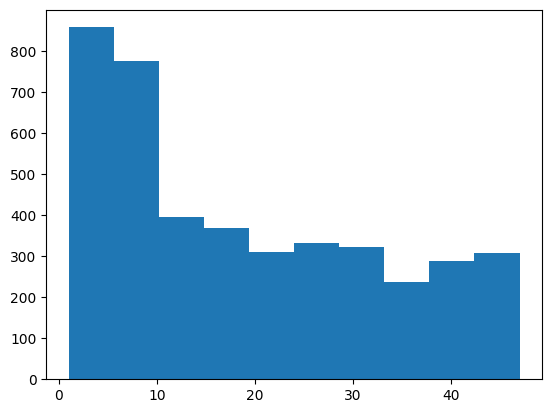

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(customer_join["membership_period"])

In [75]:
customer_end = customer_join.select_dtypes(include="number").loc[customer_join["is_deleted"]==1]
customer_end.describe()

,is_deleted,price,index,mean,median,max,min,routine_flg,membership_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,2030.260000,3.865474,3.621852,6.461481,1.821481,0.456296,8.026667
std,0.0,1949.163652,1209.012998,1.246385,1.270847,2.584021,0.976361,0.498271,5.033692
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,6000.000000,966.500000,3.000000,3.000000,4.000000,1.000000,0.000000,4.000000
50%,1.0,7500.000000,2019.000000,4.000000,4.000000,7.000000,2.000000,0.000000,7.000000
75%,1.0,10500.000000,3037.250000,4.666667,4.500000,8.000000,2.000000,1.000000,11.000000
max,1.0,10500.000000,4184.000000,9.000000,9.000000,13.000000,8.000000,1.000000,23.000000


In [77]:
customer_end = customer_join.select_dtypes(include="number").loc[customer_join["is_deleted"]==0]
customer_end.describe()

,is_deleted,price,index,mean,median,max,min,routine_flg,membership_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,2126.490148,6.030288,6.024279,8.471147,3.620690,0.984166,23.970443
std,0.0,1977.189779,1209.847743,1.553587,1.599765,1.571048,2.030488,0.124855,13.746761
min,0.0,6000.000000,0.000000,3.166667,3.000000,5.000000,1.000000,0.000000,1.000000
25%,0.0,6000.000000,1075.250000,4.833333,5.000000,7.000000,2.000000,1.000000,12.000000
50%,0.0,7500.000000,2131.500000,5.583333,5.500000,8.000000,3.000000,1.000000,24.000000
75%,0.0,10500.000000,3183.750000,7.178030,7.000000,10.000000,5.000000,1.000000,35.000000
max,0.0,10500.000000,4191.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000


In [78]:
customer_join.to_csv("customer_join.csv",index=False)